In [1]:
from numpy import *
import matplotlib.pyplot as plt
from scipy import genfromtxt
%matplotlib inline

In [2]:
nu00,nu100,U=genfromtxt("exp.csv",delimiter=';',skip_header=1).T
len(nu00)

11

[  7.80580658e-04   2.79602147e-02   3.58340368e+01] [  4.87727938e-05   7.08238254e-04   9.09014039e-01]
[ 0.01932896  0.13697352  7.16591651] [ 0.0021045   0.00595921  0.31380735]
(35.785294692041532, 2.3261458013227703)
(7.152764428020868, 0.80946519776330317)


<Container object of 3 artists>

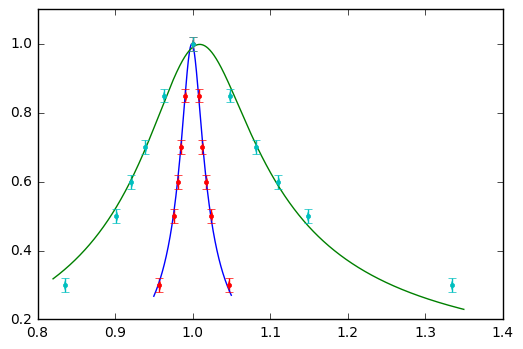

In [3]:
nu0=nu00[0]
U00=U[0]
snu=1
sU=.2
def fitf(w,A,B,C):
    return sqrt((A**2+(w*B)**2)/((1-w**2*B*C)**2+(w*A*C)**2))
from scipy.optimize import curve_fit
def sigma_corr(cmatrx):
    r=zeros(len(cmatrx))
    for i in range(len(cmatrx)):
        r[i]=sqrt(cmatrx[i,i])
    return r
ko,sko=curve_fit(fitf,nu00/nu0,U/U00,sigma=sU/U00,absolute_sigma=True,bounds=(0,inf))
skf=sko
ko,sko=curve_fit(fitf,nu00/nu0,U/U00,sigma=sU/U00,absolute_sigma=False,bounds=(0,inf))
sko+=skf
k1,sk1=ko,sigma_corr(sko)
ko,sko=curve_fit(fitf,nu100/nu0,U/U00,sigma=sU/U00,absolute_sigma=True,bounds=(0,inf))
skf=sko
ko,sko=curve_fit(fitf,nu100/nu0,U/U00,sigma=sU/U00,absolute_sigma=False,bounds=(0,inf))
sko+=skf
k2,sk2=ko,sigma_corr(sko)
print(k1,sk1)
print(k2,sk2)
arg1=arange(.95,1.05,.0005)
arg2=arange(.82,1.35,.0005)
def Qgr(k,sk):
    Qgrp=sqrt(k[1]/k[2])/k[0]
    sQgrp=Qgrp*sqrt((sk[0]/k[0])**2+(sk[1]/k[1]/2)**2+(sk[2]/k[2]/2)**2)
    return Qgrp,sQgrp
print(Qgr(k1,sk1))
print(Qgr(k2,sk2))
plt.plot(arg1,fitf(arg1,k1[0],k1[1],k1[2]))
plt.plot(arg2,fitf(arg2,k2[0],k2[1],k2[2]))
plt.errorbar(nu00/nu0,U/U00,xerr=snu/nu0,yerr=sU/U00,fmt='.')
plt.errorbar(nu100/nu0,U/U00,xerr=snu/nu0,yerr=sU/U00,fmt='.')

In [4]:
sU=0.1
def Qnar(U1,U2,U3,N):
    teta=log((U2-U1)/(U3-U2))/N
    steta=sqrt((sU/(U2-U1))**2+(sU/(U3-U2))**2)/N
    Qn=pi/teta
    sQn=pi*steta/teta**2
    return Qn,sQn
print(Qnar(0.4,1.7,2.6,5))
print(Qnar(0.8,2.3,3,6))
print(Qnar(0.8,2.4,3.3,5))

(42.716629710393313, 15.698502471679099)
(24.732404327674544, 5.1158468501802243)
(27.300907446330033, 6.0490440432528967)


In [5]:
U0=3.3
def Qnar1(U1,U2,N):
    teta=log((U0-U1)/(U0-U2))/N
    steta=sqrt((sU/(U0-U1))**2+(sU/(U0-U2))**2)/N
    Qn=pi/teta
    sQn=pi*steta/teta**2
    return Qn,sQn
print(Qnar1(0.9,1.7,1))
print(Qnar1(0.9,2.3,2))
print(Qnar1(0.9,2.7,3))
print(Qnar1(1.7,2.3,1))
print(Qnar1(1.7,2.7,2))
print(Qnar1(2.3,2.7,1))

(7.7481208389248684, 1.4354013049144125)
(7.176938523436581, 0.88809758726769794)
(6.7985402127407877, 0.84250683522747249)
(6.6841880745292102, 1.6770749270442598)
(6.4059929777649742, 1.1625542839226684)
(6.1500294962277646, 2.3400370221581697)


In [6]:
def Qzat(U1,U2,N):
    teta=log(U1/U2)/N
    steta=sqrt((sU/U1)**2+(sU/U2)**2)/N
    Qn=pi/teta
    sQn=pi*steta/teta**2
    return Qn,sQn
print(Qzat(3.9,2.,8))
print(Qzat(3.9,1.4,12))
print(Qzat(2.8,1.4,8))
print()
print(Qzat(3.5,1.6,2))
print(Qzat(3.5,1.1,3))
print(Qzat(2.3,1.1,2))

(37.633476844223658, 3.166488438984516)
(36.797416306979592, 2.725812875009936)
(36.258881134617553, 4.1774947081426923)

(8.0269694555197049, 0.70471392747189354)
(8.1426888879224251, 0.67038819266345107)
(8.5184304637290609, 1.1637922317368614)


In [7]:
Rl=25
R=100
C=0.1e-6
L=0.1
nu0t=1/(2*pi*sqrt(L*C))
Q0t=1/Rl*sqrt(L/C)
Q100t=1/(R+Rl)*sqrt(L/C)
print(nu0t,Q0t,Q100t)

1591.54943092 40.0 8.0


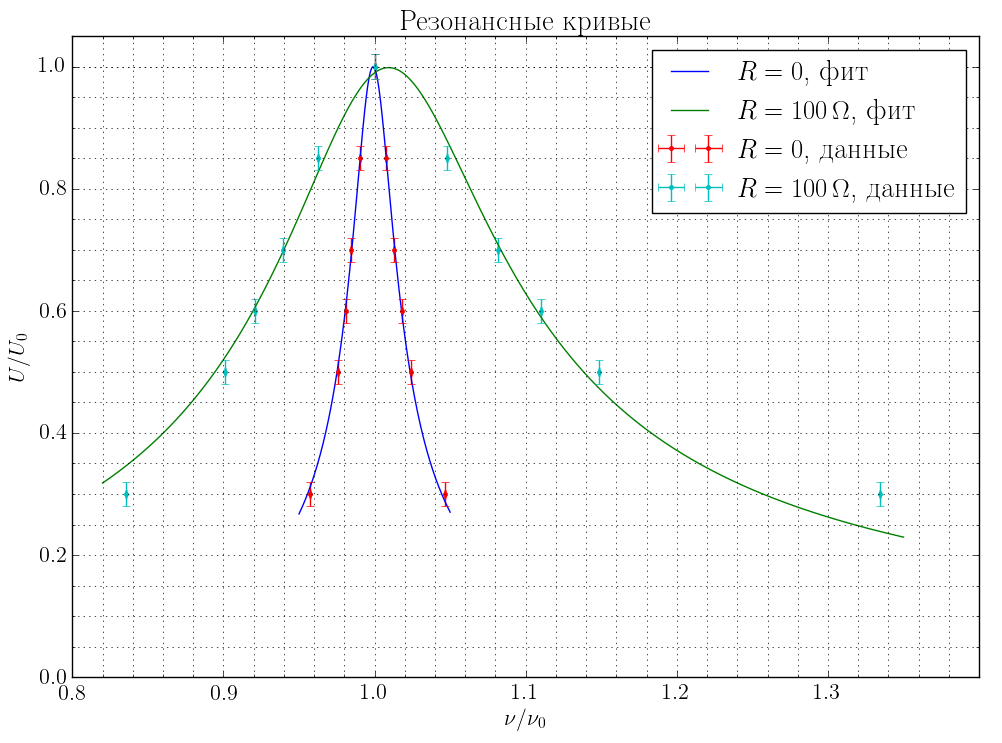

In [8]:
from matplotlib import rc
rc('figure', figsize=(11.7,8.27))
rc('font', size=16)
rc('text', usetex=True)
rc('text.latex', unicode=True)
rc('text.latex', preamble=r"\usepackage[utf8]{inputenc}")
rc('text.latex', preamble=r"\usepackage[T2A]{fontenc}")
rc('text.latex', preamble=r"\usepackage[russian]{babel}")
sU=.2
plt.plot(arg1,fitf(arg1,k1[0],k1[1],k1[2]),label="$R=0$, фит")
plt.plot(arg2,fitf(arg2,k2[0],k2[1],k2[2]),label=r"$R=100\,\Omega$, фит")
plt.errorbar(nu00/nu0,U/U00,xerr=snu/nu0,yerr=sU/U00,fmt='.',label="$R=0$, данные")
plt.errorbar(nu100/nu0,U/U00,xerr=snu/nu0,yerr=sU/U00,fmt='.',label=r"$R=100\,\Omega$, данные")
plt.axis((0.8,1.4,0,1.05))
plt.minorticks_on()
plt.grid(which='both')
plt.title("Резонансные кривые")
plt.xlabel(r"$\nu / \nu_0$")
plt.ylabel(r"$U / U_0$")
plt.legend()
plt.savefig("graph0.pdf")